<p style='text-align:center'>
PSY 394U <b>Methods for fMRI</b>, Fall 2019


<img style='width: 300px; padding: 0px;' src='https://github.com/sathayas/JupyterfMRIFall2019/blob/master/Images/Placebo_Left.png?raw=true' alt='brain blobs'/>

</p>


<p style='text-align:center; font-size:40px; margin-bottom: 30px;'><b> Handling data with Python </b></p>

<p style='text-align:center; font-size:18px; margin-bottom: 32px;'><b>September 16, 2019</b></p>

<hr style='height:5px;border:none' />

# Dictionaries
<hr style="height:1px;border:none" />

## What is a dictionary? 

A **dictionary** is like a list. But unlike a list whose items are indexed by a number, we can refer items in a dictionary with keys. Here is an example of a dictionary.

In [1]:
bookInfo = {'Author':'Sweigart, Al',
            'Title':'Automate the Boring Stuff with Python',
            'Publisher':'No Starch Press',
            'Year': 2015,
            'Pages':503}

In [2]:
bookInfo

{'Author': 'Sweigart, Al',
 'Pages': 503,
 'Publisher': 'No Starch Press',
 'Title': 'Automate the Boring Stuff with Python',
 'Year': 2015}

Each item in the dictionary consists of a **key** and a **value** separated by a colon (`:`). You can use a key to access the value of the corresponding item. For example,

In [3]:
bookInfo['Author']

'Sweigart, Al'

In [4]:
bookInfo['Pages']

503

You can just get keys, to see what fields are in a dictionary.

In [5]:
bookInfo.keys()

dict_keys(['Year', 'Pages', 'Author', 'Publisher', 'Title'])

Likewise, you can just get values.

In [6]:
bookInfo.values()

dict_values([2015, 503, 'Sweigart, Al', 'No Starch Press', 'Automate the Boring Stuff with Python'])

You can also get a list of key-value pairs. This becomes handy when you are writing a for loop.

In [7]:
bookInfo.items()

dict_items([('Year', 2015), ('Pages', 503), ('Author', 'Sweigart, Al'), ('Publisher', 'No Starch Press'), ('Title', 'Automate the Boring Stuff with Python')])

So, *why should we care about dictionaries?* Sometimes it makes sense to organize multiple properties of an object / individual as a single entity, as opposed to a collection of separate variables. JSON file format is a universal format to describe dictionary-like information.

## JSON dictionary files (`.json`)

A JSON (JavaScript Object Notation) file contains pairs of keys and values, just as a dictionary in python. JSON files can be used to describe details about data sets, sessions, runs, tasks, or imaging parameters in an fMRI experiment. 

If you have mounted the flanker data from the previous class to `/tmp/Data/ds102` in your Docker image, then you can follow the following demonstration on JSON files.

In [8]:
import os
import json

dataDir = '/tmp/Data/ds102'

There are two JSON files in this directory: **`task-flanker_bold.json`** (describing the experiment design), and **`dataset_description.json`** (describing the data set). 

Let's examine what `task-flanker_bold.json` file looks like.

In [10]:
fJSON = os.path.join(dataDir,'task-flanker_bold.json')

The **`os.path.join`** function concatenates the path to a directory (in this particular case, `/tmp/Data/ds102` stored in variable `dataDir`) and a file name (in this case, `task-flanker_bold.json`). 

In [11]:
fJSON

'/tmp/Data/ds102/task-flanker_bold.json'

The file contains the following:

```
{
	"RepetitionTime": 2.0,
	"TaskName": "Flanker",
	"TaskDescription": "On each trial (inter-trial interval (ITI) varied between 8 s and 14 s; mean ITI=12 s),participants used one of two buttons on a response pad to indicate the direction of a central arrow in an array of 5 arrows. In congruent trials the flanking arrows pointed in the same direction as the central arrow (e.g., < < < < <), while in more demanding incongruent trials the flanking arrows pointed in the opposite direction (e.g., < < > < <). Subjects performed two 5-minute blocks, each containing 12 congruent and 12 incongruent trials, presented in a pseudorandom order.",
	"CogAtlasID": "tsk_4a57abb949a4f",
	"Manufacturer": "Siemens",
	"ManufacturerModelName": "Allegra",
	"MagneticFieldStrength": 3.0,
	"ScanningSequence": "Echo Planar",
	"MRAcquisitionType": "2D",
	"EchoTime": 0.030,
	"FlipAngle": 80.0
}
```

As you can see, there are different keys (`RepetitionTime`, `TaskName`, ..., `FlipAngle`) and the values associated with them.

To read this file as a dictionary object, we use the **`load()`** function under the **`json`** library.

In [15]:
g = open(fJSON,'r')
dataDic = json.load(g)
g.close()

We can see the entire dictionary object,

In [16]:
dataDic

{'CogAtlasID': 'tsk_4a57abb949a4f',
 'EchoTime': 0.03,
 'FlipAngle': 80.0,
 'MRAcquisitionType': '2D',
 'MagneticFieldStrength': 3.0,
 'Manufacturer': 'Siemens',
 'ManufacturerModelName': 'Allegra',
 'RepetitionTime': 2.0,
 'ScanningSequence': 'Echo Planar',
 'TaskDescription': 'On each trial (inter-trial interval (ITI) varied between 8 s and 14 s; mean ITI=12 s),participants used one of two buttons on a response pad to indicate the direction of a central arrow in an array of 5 arrows. In congruent trials the flanking arrows pointed in the same direction as the central arrow (e.g., < < < < <), while in more demanding incongruent trials the flanking arrows pointed in the opposite direction (e.g., < < > < <). Subjects performed two 5-minute blocks, each containing 12 congruent and 12 incongruent trials, presented in a pseudorandom order.',
 'TaskName': 'Flanker'}

Or just a particular element.

In [17]:
dataDic['RepetitionTime']

2.0

One thing to note here is that a dictionary object does not have a particular ordering of elements, unlike lists. So the order of elements may not be the same as that of the original JSON file.

### Exercise
**Data set description**. Write a code to read the data set description JSON file **`dataset_description.json`** as a dictionary. Print out all the keys in the resulting dictionary.

# Data frames
<hr style="height:1px;border:none" />

Say, you have some data in the form of a table. For example, the file **`participants.tsv`** under the `ds102` directory contains the following information.

```
participant_id	gender	age
sub-01	F	21.94
sub-02	M	22.79
sub-03	M	19.65
sub-04	M	25.98
sub-05	M	23.24
sub-06	M	23.27
sub-07	D	34.72
sub-08	D	22.22
...
```

Here, columns represent different variables (`participant_id`, `gender`, and `age`), whereas rows represent different individuals / observations (`sub-01`, `sub-02`, and so on). We can handle this collection of information as a single **data frame** object. A Python library **Pandas** has a collection of utilities for data frames. So let's read this data as a data frame object.

[`<LoadTable.py>`](https://github.com/sathayas/fMRIClassFall2019/blob/master/HandlingData/LoadTable.py)

In [1]:
import os
import pandas as pd

Note that **`pandas`** library is imported with a short-hand notation **`pd`**. This becomes handy, as you do not have to type `pandas` every time you want to use functions in this library!

In [2]:
# data directory & file
dataDir = '/tmp/Data/ds102'
fileTable = os.path.join(dataDir,'participants.tsv')

# Loading the data file as a data frame object
ptData = pd.read_csv(fileTable, sep='\t')

The function **`read_csv`** reads the data table from a file (as specified in the variable `fileTable`). This function is designed for csv (comma-separated values) file format; since values are separated by tabs (or `\t`s), we need to specify a parameter **`set='\t'`**).

Here is what has been read from the file:

In [3]:
ptData

,participant_id,gender,age
0,sub-01,F,21.94
1,sub-02,M,22.79
2,sub-03,M,19.65
3,sub-04,M,25.98
4,sub-05,M,23.24
5,sub-06,M,23.27
6,sub-07,D,34.72
7,sub-08,D,22.22
8,sub-09,M,22.70
9,sub-10,D,25.24


## Useful methods for data frames

There are some useful methods associated with a data frame object. You can examine the first few observations in a data frame with the **`head()`** method.

In [4]:
ptData.head()

,participant_id,gender,age
0,sub-01,F,21.94
1,sub-02,M,22.79
2,sub-03,M,19.65
3,sub-04,M,25.98
4,sub-05,M,23.24


To get names of the columns, you can use **`columns`**.

In [6]:
ptData.columns

Index(['participant_id', 'gender', 'age'], dtype='object')

You can get some basic descriptive statistics for each column by using the **`describe()`** method.

In [7]:
ptData.describe()

,age
count,26.000000
mean,28.337692
std,7.779989
min,19.650000
25%,22.902500
50%,25.850000
75%,33.585000
max,49.790000


You can sort the entire data frame based on a variable using the **`sort_values()`** method. For example, we can sort the data according to the variable **`age`** in ascending order. I am showing only the 10 youngest subjects using the `head()` method.

In [11]:
ptData.sort_values(by='age').head(10)

,participant_id,gender,age
2,sub-03,M,19.65
10,sub-11,M,21.80
0,sub-01,F,21.94
7,sub-08,D,22.22
8,sub-09,M,22.70
1,sub-02,M,22.79
22,sub-23,M,22.79
4,sub-05,M,23.24
5,sub-06,M,23.27
17,sub-18,D,24.03


Or in the descending order by specifying **`ascending=False`**.

In [12]:
ptData.sort_values(by='age', ascending=False).head(10)

,participant_id,gender,age
13,sub-14,M,49.79
15,sub-16,M,49.03
16,sub-17,D,35.77
6,sub-07,D,34.72
24,sub-25,M,34.56
19,sub-20,M,34.19
14,sub-15,D,34.06
25,sub-26,M,32.16
23,sub-24,M,27.24
21,sub-22,D,27.00


## Indexing and slicing a data frame

In a data frame, you can access individual column (or variable) by

In [13]:
ptData.age

0     21.94
1     22.79
2     19.65
3     25.98
4     23.24
5     23.27
6     34.72
7     22.22
8     22.70
9     25.24
10    21.80
11    26.00
12    25.72
13    49.79
14    34.06
15    49.03
16    35.77
17    24.03
18    24.67
19    34.19
20    26.22
21    27.00
22    22.79
23    27.24
24    34.56
25    32.16
Name: age, dtype: float64

or

In [14]:
ptData['age']

0     21.94
1     22.79
2     19.65
3     25.98
4     23.24
5     23.27
6     34.72
7     22.22
8     22.70
9     25.24
10    21.80
11    26.00
12    25.72
13    49.79
14    34.06
15    49.03
16    35.77
17    24.03
18    24.67
19    34.19
20    26.22
21    27.00
22    22.79
23    27.24
24    34.56
25    32.16
Name: age, dtype: float64

You can slice rows in a data frame very easily. For example,

In [15]:
ptData[5:8]

,participant_id,gender,age
5,sub-06,M,23.27
6,sub-07,D,34.72
7,sub-08,D,22.22


You can slice rows with only a few selected variables only, using the **`loc`** method.

In [16]:
ptData.loc[5:8,['participant_id','age']]

,participant_id,age
5,sub-06,23.27
6,sub-07,34.72
7,sub-08,22.22
8,sub-09,22.70


And you can use the data itself to select a subset of data, like in arrays. For example, you can find subjects 30 years or older by

In [17]:
ptData[ptData.age>30]

,participant_id,gender,age
6,sub-07,D,34.72
13,sub-14,M,49.79
14,sub-15,D,34.06
15,sub-16,M,49.03
16,sub-17,D,35.77
19,sub-20,M,34.19
24,sub-25,M,34.56
25,sub-26,M,32.16


## Saving a data frame

You can manipulate a data frame and save it as a CSV file quite easily. Here is an example with the participant information data frame.

[`<SaveTable.py>`](https://github.com/sathayas/fMRIClassFall2019/blob/master/HandlingData/SaveTable.py)

In [21]:
# Sorting by age in descending order
ptData.sort_values(by='age', ascending=False, inplace=True)

First, the data frame was sorted by age in descending order. The parameter **`inplace=True`** specifies that the operation (sorting in this case) is applied to the data frame, resulting in an altered data frame.

In [22]:
ptData.head(10)

,participant_id,gender,age
13,sub-14,M,49.79
15,sub-16,M,49.03
16,sub-17,D,35.77
6,sub-07,D,34.72
24,sub-25,M,34.56
19,sub-20,M,34.19
14,sub-15,D,34.06
25,sub-26,M,32.16
23,sub-24,M,27.24
21,sub-22,D,27.00


From this data frame, we select observations with **`gender`** being **D** (I am not sure what it stands for). 

In [23]:
ptData[ptData.gender=='D']

,participant_id,gender,age
16,sub-17,D,35.77
6,sub-07,D,34.72
14,sub-15,D,34.06
21,sub-22,D,27.00
11,sub-12,D,26.00
9,sub-10,D,25.24
18,sub-19,D,24.67
17,sub-18,D,24.03
7,sub-08,D,22.22


We write this to a CSV file. To do so, we can use the **`to_csv`** method. The output file name is the first parameter (required). We also specify **`index=False`** to drop the index column (with sequential numbers in the first column). 

In [24]:
# output file name
fileOut = os.path.join(dataDir,'sorted_D.csv')

# selecting observations with gender=D, saving to a CSV file
ptData[ptData.gender=='D'].to_csv(fileOut, index=False)

This produces the output file **`sorted_D.csv`**, which looks like:

```
sub-17,D,35.77
sub-07,D,34.72
sub-15,D,34.06
sub-22,D,27.0
sub-12,D,26.0
sub-10,D,25.24
sub-19,D,24.67
sub-18,D,24.03
sub-08,D,22.22
```

### Exercise

**Sort by subject ID**. Load the file we just created, `sorted_D.csv`, into a data frame. Sort observations by their subject IDs. *Hint: you do not need to use `sep` parameter in the `read_csv` function.*

# NumPy arrays
<hr style="height:1px;border:none" />

## Creating an array
An array is a data type available in **`NumPy`**. It is similar to a list, but much more
versatile than a list, and especially useful for scientific data.

In [1]:
import numpy as np
a = np.array([1, 2, 3, 4, 5])

Here, we created an array object called **`a`**. 

In [2]:
a

array([1, 2, 3, 4, 5])

An array can be two dimensional (or higher). For example,

In [3]:
c = np.array([[1,2,3],[4,5,6],[7,8,9],[10,11,12]])
c

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

You can examine the shape of an array using the **`ndim`** method (to examine
dimension), the **`shape`** method (to examine the size in each dimension), and the
**`size`** method (to examine the total number of elements).

In [4]:
c.ndim

2

In [5]:
c.shape

(4, 3)

In [6]:
c.size

12

This tells us that the array `c` is two-dimensional, with 4 rows and 3 columns, and
has 12 elements.

In practice, you usually do not enter elements one by one. Here are some useful
functions. First an array of ones with **`np.ones()`** function.

In [7]:
np.ones((3,3))

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

And an array of zeros with **`np.zeros()`** function.

In [8]:
np.zeros((4,5))

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

You can change the shape of an array with the **`reshape()`** method. An array of 15 numbers are reshaped into different 2D arrays. Here, we generate a sequence of 15 consecutive numbers by **`np.arange()`** function (which works just like the `range` function).

In [9]:
a = np.arange(15)
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

And re-shaping the array.

In [10]:
b = a.reshape(3,5)
b

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

## Working with an array

Unlike lists, arrays can be used in mathematical operations. For example,

In [11]:
a = np.ones((3,3))
a

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [12]:
b = np.ones((3,3))
b = np.arange(9).reshape(3,3)
b

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [13]:
a + b

array([[1., 2., 3.],
       [4., 5., 6.],
       [7., 8., 9.]])

In [14]:
a * b

array([[0., 1., 2.],
       [3., 4., 5.],
       [6., 7., 8.]])

An operation involving arrays is performed on element-by-element basis. You can also perform an operation between an array and a scalar (i.e., a single number). In such a case, each element in the array is used in an operation with a scalar.

In [15]:
a + 10

array([[11., 11., 11.],
       [11., 11., 11.],
       [11., 11., 11.]])

In [16]:
5 * a

array([[5., 5., 5.],
       [5., 5., 5.],
       [5., 5., 5.]])

## Useful methods

Here are some useful methods for arrays. First, finding the maximum with the **`max`** method. You can find the maximum for the entire array.

In [17]:
a = np.random.rand(4,3)
a

array([[0.7415318 , 0.27103295, 0.70058877],
       [0.18791041, 0.47851766, 0.1415533 ],
       [0.9704236 , 0.65705583, 0.52191829],
       [0.24765352, 0.83864401, 0.18539696]])

This is an array of random numbers in a 4 x 3 array. You can find the maximum in this array by the **`max`** method.

In [18]:
a.max()

0.9704235994201104

Or max at each row (indicated by **`axis=1`** parameter)

In [19]:
a.max(axis=1)

array([0.7415318 , 0.47851766, 0.9704236 , 0.83864401])

Or each column (indicated by `axis=0`)

In [20]:
a.max(axis=0)

array([0.9704236 , 0.83864401, 0.70058877])

There are other useful methods such as:
  * **`min`**: minimum
  * **`sum`**: sum
  * **`mean`**: mean
  * **`std`**: standard deviation

There are equivalent functions in NumPy, if you are used to calculating these with functions. 

## Indexing and slicing

You can index and slice an array just the same way as a list.

In [24]:
x = np.arange(10)**2
x

array([ 0,  1,  4,  9, 16, 25, 36, 49, 64, 81])

In [25]:
x[4]

16

In [26]:
x[4:]

array([16, 25, 36, 49, 64, 81])

In [27]:
x[-3:]

array([49, 64, 81])

Unlike a list, you can also have a list of indices to access elements as well.

In [28]:
x[[1,3,7,8]]

array([ 1,  9, 49, 64])

In [29]:
x[[1,1,1,9]]

array([ 1,  1,  1, 81])

For a 2D array, the first index corresponds to the row, and the second index corresponds to the column. Both row and column indices can be a number (i.e., index) or a slice.

In [30]:
b = np.arange(15).reshape(3,5)
b

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [31]:
b[1:,3:]

array([[ 8,  9],
       [13, 14]])

And, you can use a list for row indices or column indices as well.

In [32]:
b[[1,1,0],2:]

array([[7, 8, 9],
       [7, 8, 9],
       [2, 3, 4]])

In [33]:
b[[0,1,0,2,1],[1,1,3,3,2]]

array([ 1,  6,  3, 13,  7])

## Conditional indexing

With an array, it is easy to generate a sub-array satisfying certain conditions. For
example, let's say you have the following data.

[`<ExampleData.py>`](https://github.com/sathayas/fMRIClassFall2019/blob/master/HandlingData/ExampleData.py)

In [34]:
import numpy as np

# subject ID
subjID = np.array(['sub001']*3 + ['sub005']*4 + ['sub010']*3)
# response time (ms)
RT = np.array([ 98,  96,  86,  90,  95,  80, 117,  90, 114, 113])
# score
score = np.array([0, 0, 1, 0, 1, 0, 0, 0, 1, 0])

print('ID\tRT\tScore')
for i,iID in enumerate(subjID):
    print(iID, RT[i], score[i], sep='\t')

ID	RT	Score
sub001	98	0
sub001	96	0
sub001	86	1
sub005	90	0
sub005	95	1
sub005	80	0
sub005	117	0
sub010	90	0
sub010	114	1
sub010	113	0


In [35]:
subjID[subjID=='sub005']

array(['sub005', 'sub005', 'sub005', 'sub005'], dtype='<U6')

In [36]:
RT[subjID=='sub005']

array([ 90,  95,  80, 117])

In [37]:
score[subjID=='sub005']

array([0, 1, 0, 0])

# Image data
<hr style="height:1px;border:none" />

Now that we know how to handle array data in Python, we can take a look at some image data. Brain image data are often saved as 3D arrays (e.g., T1-weighted structural MRI) or 4D arrays (e.g., fMRI time series). For this exercise, we will use the flanker task data you downladed earlier.

## Reading image data

Now let's take a look at some image data. For this exercise, we examine a subject from the `ds102` data set. I want you to select a random subject from the data set. To get a list of subjects, you can run this program. 

[`<ListSubjects.py.`](https://github.com/sathayas/fMRIClassFall2019/blob/master/HandlingData/ListSubjects.py)

In [38]:
import os

# Directory where your data set resides.
dataDir = '/tmp/Data/ds102'

# getting a list of directory contents
dirContents = os.listdir(dataDir)
dirContents.sort()

# printing out a list of subjects (i.e., directories starting with sub-)
for iFile in dirContents:
    if 'sub-' in iFile:
        print(iFile)

sub-01
sub-02
sub-03
sub-04
sub-05
sub-06
sub-07
sub-08
sub-09
sub-10
sub-11
sub-12
sub-13
sub-14
sub-15
sub-16
sub-17
sub-18
sub-19
sub-20
sub-21
sub-22
sub-23
sub-24
sub-25
sub-26


From these subjects, I randomly pick a subject **`sub-26`**. Under that subject's directory, there are two directories called **`anat`** (where high-resolution structural MRI data resides) and **`func`** (where 4D fMRI data file(s) resides). For the following exercises, we will read the structural MRI data and one of fMRI time series data. For the structural MRI data, there is only one image data (with **`.nii`** extension, or a NIfTI file) in the **`anat`** directory. For the fMRI data, you can choose one of the `.nii` files randomly. In my case, under the `anat` directory:
```
sub-26_T1w.nii.gz
```
And under the `func` directory:
```
sub-26_task-flanker_run-1_bold.nii.gz
sub-26_task-flanker_run-2_bold.nii.gz
```
I will pick **`sub-26_task-flanker_run-2_bold.nii.gz`** for the exercise.

Here is an example code to read structural and functional MRI data.

[`<ReadImageData.py>`](https://github.com/sathayas/fMRIClassFall2019/blob/master/HandlingData/ReadImageData.py)

In [39]:
import os
import numpy as np
import nibabel as nib

# Directory where your data set resides.
dataDir = '/tmp/Data/ds102'

# paths for the structural and functional MRI data.
f_sMRI = os.path.join(dataDir,'sub-26/anat/sub-26_T1w.nii.gz')
f_fMRI = os.path.join(dataDir,'sub-26/func/sub-26_task-flanker_run-2_bold.nii.gz')

Note that we are importing the **`nibabel`** library as **`nib`**.

In [40]:
f_sMRI

'/tmp/Data/ds102/sub-26/anat/sub-26_T1w.nii.gz'

In [41]:
f_fMRI

'/tmp/Data/ds102/sub-26/func/sub-26_task-flanker_run-2_bold.nii.gz'

In [42]:
# reading in the image data arrays
# structural MRI
sMRI = nib.load(f_sMRI)
X_sMRI = sMRI.get_data()

# fMRI
fMRI = nib.load(f_fMRI)
X_fMRI = fMRI.get_data()

The function **`nib.load`** is used to create an object for the image data. To actually read the image data array, you need to use the **`get_data`** method associated with an image object. 

So, were image data loaded correctly? Let's check.

In [43]:
X_sMRI.shape

(176, 256, 256)

In [44]:
X_fMRI.shape

(64, 64, 40, 146)

Here, the structural MRI is a 3D array of size 176 x 256 x 256, whereas the fMRI is a 4D array of size 64 x 64 x 40 x 164. 

## T1 image

Now, let's take a look at the T1-weighted image (or structural MRI). But before doing that, if you want to see images on Jupyter notebook, you have to run this line.

In [6]:
%matplotlib inline

[`<ShowT1Image.py>`](https://github.com/sathayas/fMRIClassFall2019/blob/master/HandlingData/ShowT1Image.py)

In [7]:
import os
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
from nilearn.plotting import plot_anat

Let's load the T1 image data first for Subject 26.

In [8]:
# Directory where your data set resides.
dataDir = '/tmp/Data/ds102'

# reading in the T1 image data array
f_sMRI = os.path.join(dataDir,'sub-26/anat/sub-26_T1w.nii.gz')
sMRI = nib.load(f_sMRI)
X_sMRI = sMRI.get_data()

We display this image using **`plotting`** utilities included in the **`nilearn`** library. For this T1-image, we use the **`plot_anat`** function.

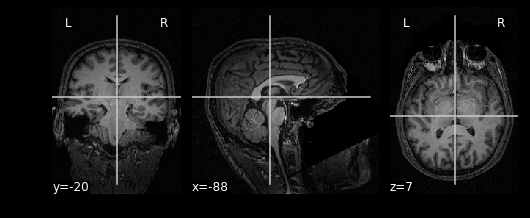

In [11]:
# displaying image
plot_anat(f_sMRI,
          display_mode='ortho',
          dim=-1,
          draw_cross=True,
          annotate=True)

From left to right, we are seeing 3 different ways to slice the brain:
  * **Coronal** section - (xz-plane)
  * **Sagittal** section - (yz-plane)
  * **Axial** section - (xy-plane)

You can take a look at the intensity of a certain voxel. For example,

In [12]:
X_sMRI[85,110,140]

289

The mean and standard deviation of voxel intensities are:

In [13]:
X_sMRI.mean()

53.34662142666903

In [14]:
X_sMRI.std()

83.2834841684843

Note that image intensities on MRI images are on an arbitrary scale.  

Now we can calculate the average intensity in the x-direction.

In [20]:
# average intensity in the x-direction
avgX_X_sMRI = X_sMRI.mean(axis=0)

Here, the average in the x-direction is calculated by specifying **`axis=0`** in the `mean()` method. You can set **`axis=1`** or **`axis=2`** for the average across the y-axis or the z-axis, respectively. 

Notice that the resulting average image is no longer a 3D array.

In [22]:
avgX_X_sMRI.shape

(256, 256)

(-0.5, 255.5, 255.5, -0.5)

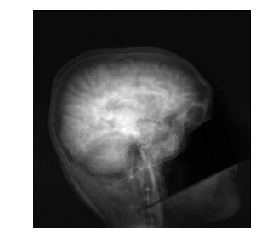

In [18]:
# showing the resulting image
plt.imshow(np.rot90(avgX_X_sMRI), cmap='gray')
plt.axis('off')

The image is displayed in the **`imshow`** function in **`matplotlib.pyplot`** library (referred as `plt`). Here, we have to rotate the average image by 90 degree in the clock-wise direction with **`np.rot90`** function. The parameter **`cmap='gray'`** specifies that the image is displayed in gray scale.

### Exercise
1. **Maximum intensity projection**. In the 3D T1 image from above, calculate the maximum intensity along one of the axes and display the resulting image. (You may post your code, *not the resulting figure*, on Canvas discussion.)

## fMRI data

Now, let's take a look at the fMRI data. 

[`<ShowfMRI.py>`](https://github.com/sathayas/fMRIClassFall2019/blob/master/HandlingData/ShowfMRI.py)

In [29]:
import os
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
from nilearn.plotting import plot_epi, view_img
from nilearn.image import index_img

# Directory where your data set resides.
dataDir = '/tmp/Data/ds102'


# reading in the fMRI data array
f_fMRI = os.path.join(dataDir,'sub-26/func/sub-26_task-flanker_run-2_bold.nii.gz')
fMRI = nib.load(f_fMRI)
X_fMRI = fMRI.get_data()

As you recall, the data array is 4D in the fMRI data. 

In [6]:
X_fMRI.shape

(64, 64, 40, 146)

The first 3 dimensions correspond to the 3D space defined by xyz-coordinates, and the last dimension corresponds to time points. In this case, there are 146 time points. You can take a look at the time course at the particular voxel.

In [7]:
X_fMRI[32,28,22,:]

array([457, 452, 453, 435, 450, 431, 457, 427, 438, 454, 429, 385, 416,
       473, 423, 398, 438, 416, 417, 397, 413, 401, 419, 435, 418, 400,
       415, 395, 437, 442, 420, 406, 404, 431, 416, 436, 423, 404, 423,
       390, 424, 438, 447, 458, 418, 412, 366, 404, 423, 410, 447, 426,
       406, 408, 386, 435, 428, 423, 417, 405, 427, 393, 420, 384, 410,
       415, 425, 401, 410, 407, 396, 387, 453, 416, 420, 401, 426, 388,
       402, 379, 416, 410, 414, 408, 379, 430, 405, 375, 382, 363, 424,
       397, 404, 402, 397, 376, 418, 400, 405, 376, 414, 380, 399, 441,
       406, 362, 379, 377, 382, 387, 377, 379, 384, 384, 401, 366, 359,
       409, 375, 407, 378, 375, 390, 383, 373, 369, 414, 370, 406, 400,
       374, 373, 363, 379, 379, 368, 389, 385, 389, 391, 374, 358, 399,
       388, 365, 437], dtype=int16)

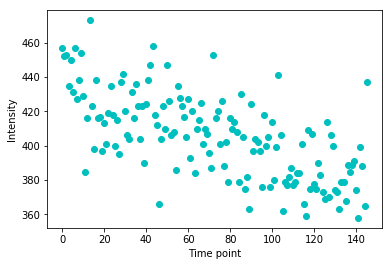

In [9]:
# arbitrary voxel coordinate
xSlice = 32
ySlice = 28
zSlice = 22
tSlice = 0

# plotting the fMRI time series
plt.plot(np.arange(X_fMRI.shape[-1]), X_fMRI[xSlice,ySlice,zSlice,:],'co')
plt.xlabel('Time point')
plt.ylabel('Intensity')
plt.show()


Here, the **`plt.plot`** function plots data points. The first input parameter specifies the x-coordinates of the data points, and likewise the second input parameter specifies the y-coordinates. The string **`'co'`** specifies the color and plot symbol (in this case, `'c'` for cyan and `'o'` for circles).

### Exercise
1. **Mean time course**. On your fMRI data, calculate the mean intensity at each time point. Then plot the mean intensity time series. (Post your code, not the resulting figure, on Canvas).

At each time point, the fMRI data is a 3D volume. Let's take a look at the first volume.

In [15]:
# first extracting a time point from fMRI time series
single_image = index_img(f_fMRI, tSlice)

The function **`index_img`** under **`nilearn.image`** extracts a time point (3D volume) specified by the parameter **`tSlice`** from a 4D fMRI time series. This produces an image object of the extracted time point (in this case, **`single_image`**). Then we use the **`plot_epi`** function to display this 3D image object. 

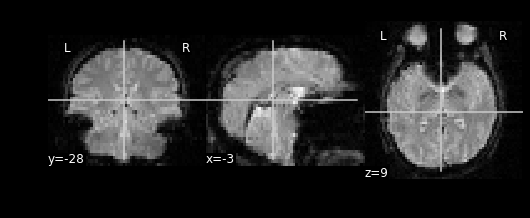

In [17]:
# showing the slngle image, extracted 3D volume from 4D data
plot_epi(single_image,
         display_mode='ortho',
         draw_cross=True,
         annotate=True,
         cmap='gray')

There is a function called **`view_img`** under `nilearn.plotting` that enables interactive visualization of an image. 

In [35]:
# interactive visualization
view_img(single_image, bg_img=False, cmap='gray', symmetric_cmap=False,
        vmin=50, vmax=1500, black_bg=True)     

### Exercise
1. **Mean and sd images**. Calculate the mean and standard deviation (sd) across time points. This should result in 3D mean and sd images. Display a section of the resulting images. (Post your code, not the resulting images, on Canvas). ***Hint:*** *The resulting image is a 3D array. To display as a 2D image, you need to use the `plt.imshow` function.*
2. **De-mean fMRI data**. At each time point in the fMRI data, calculate the mean intensity of all voxels at that time point. Then subtract that mean intensity from each time point. The plot the time series at a particular voxel over time. (Post your code, not the resulting images, on Canvas).